In [1]:
import sys, os
sys.path.append('..'); os.chdir('..')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
DROP_FILES = [
    "emonet_8_15ep_scratch.pth",
    "emonet_8_FT_5ep_mod.pth",
    "emonet_8_FT_5ep.pth",
]

In [10]:
# plot subplots
df = pd.read_csv("data/emodataset/evaluations.csv")
for file in DROP_FILES:
    df = df[df['parameters_file'] != file]
df

,parameters_file,ccc_v,ccc_a,ccc_mean,rmse_v,rmse_a,mae_v,mae_a,expr_acc,description
0,emonet_8_untrained.pth,0.0004,0.0017,0.0011,0.682,0.4930,0.6566,0.3960,0.0599,Untrained
1,emonet_8.pth,0.5240,0.1620,0.3430,0.539,0.4150,0.4270,0.3340,0.5840,Pretrained (8 classes)
5,emonet_8_FT_16ep.pth,0.7707,0.3234,0.5470,0.449,0.3356,0.3218,0.2808,0.7335,Fine-tuned (16 epochs)


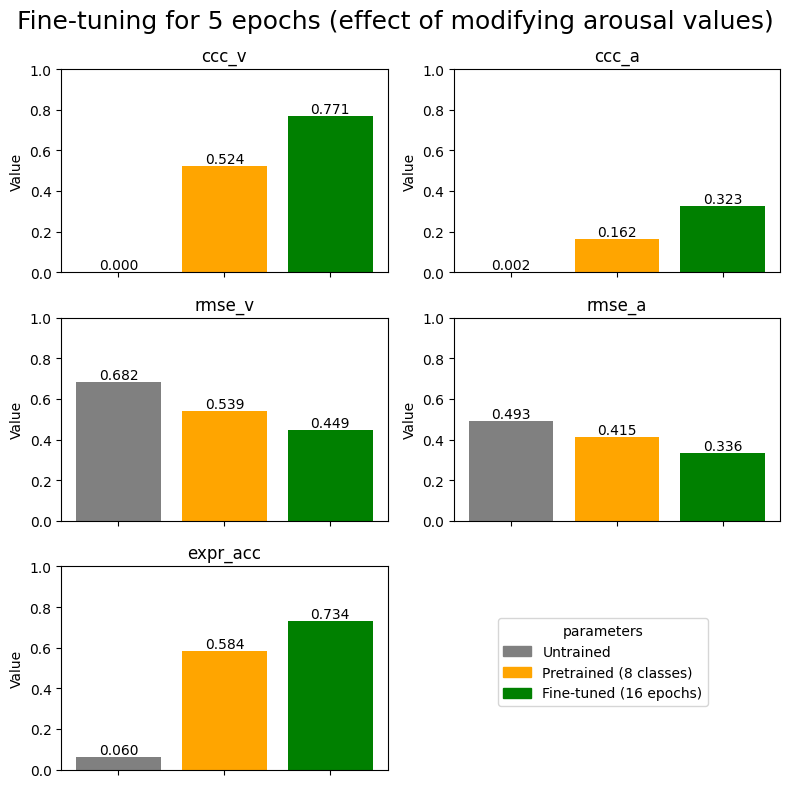

In [11]:
import matplotlib.patches as mpatches

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','expr_acc']

models = df['parameters_file'].tolist()
descriptions = df['description'].tolist()
x = np.arange(len(models))

colors = ["grey", "orange", "green", "blue", "cyan", "red"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df[metric].tolist()
    bars = ax.bar(x, values, color=colors)
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_ylim(0, 1)
    # ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.3f}', ha='center', va='bottom')

plt.suptitle('Fine-tuning for 5 epochs (effect of modifying arousal values)', fontsize=18)
axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()